In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pwd

'/Users/zlf/ProjectsRemote/2022-DEPlan/DiffPlanLib/envs/visual_nav'

In [3]:
# %cd '/mnt/Z-LabData-6T/zlf-nfs-hdd/projects/2022-DEPlan/DiffPlanLib'
%cd '/Users/zlf/ProjectsRemote/2022-DEPlan/DiffPlanLib/'

/Users/zlf/ProjectsRemote/2022-DEPlan/DiffPlanLib


In [4]:
%matplotlib inline
from IPython import display

# import

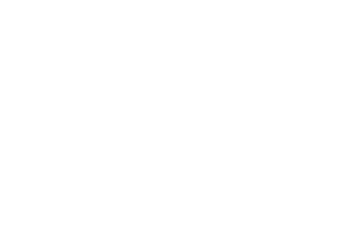

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.axis('off')
# sns.set()
# sns.set_palette('pastel')
sns.set_palette('deep')
matplotlib.rc_file_defaults()

# test texture

In [6]:
from envs.maze_env import generate_maze

In [7]:
maze = generate_maze(7, 0)

In [8]:
from envs.visual_nav.nav_wrapper import MazeNavWorld

In [9]:
env = MazeNavWorld(maze_map=maze, domain_rand=True, obs_width=64, obs_height=64)

Falling back to num_samples=4
Falling back to non-multisampled frame buffer
Falling back to num_samples=4
Falling back to non-multisampled frame buffer


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/gym/utils/seeding.py:47: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(


# visualize world

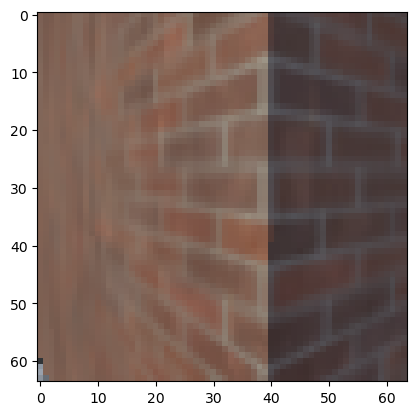

In [10]:
plt.imshow(env.reset())
# plt.axis('off')

# render all

In [11]:
pos2pano, pos2top = env.get_all_pano(vis_top=True)

(Debug) position = [1.5 0.  1.5], orientation = 1.5707963267948966
(Debug) position = [1.5 0.  1.5], orientation = 0.0
(Debug) position = [1.5 0.  1.5], orientation = 4.71238898038469
(Debug) position = [1.5 0.  1.5], orientation = 3.141592653589793
(Debug) position = [2.5 0.  1.5], orientation = 1.5707963267948966
(Debug) position = [2.5 0.  1.5], orientation = 0.0
(Debug) position = [2.5 0.  1.5], orientation = 4.71238898038469
(Debug) position = [2.5 0.  1.5], orientation = 3.141592653589793
(Debug) position = [3.5 0.  1.5], orientation = 1.5707963267948966
(Debug) position = [3.5 0.  1.5], orientation = 0.0
(Debug) position = [3.5 0.  1.5], orientation = 4.71238898038469
(Debug) position = [3.5 0.  1.5], orientation = 3.141592653589793
(Debug) position = [5.5 0.  1.5], orientation = 1.5707963267948966
(Debug) position = [5.5 0.  1.5], orientation = 0.0
(Debug) position = [5.5 0.  1.5], orientation = 4.71238898038469
(Debug) position = [5.5 0.  1.5], orientation = 3.141592653589793


In [12]:
pos2pano.shape

(7, 7, 4, 64, 64, 3)

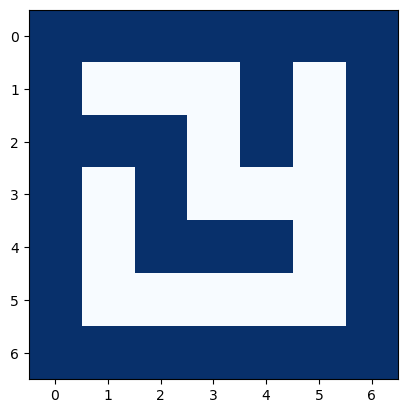

In [13]:
plt.imshow(maze, cmap='Blues_r')
# plt.axis('off')

# test visualization

In [14]:
from utils.vis_visual_nav import render_all_ego_obs, setup_interactive_ego_obs, run_pano_obs

In [15]:
# run_pano_obs(map_img=maze_map, all_obs=pano_obs)

In [16]:
pos2obs_src = render_all_ego_obs(pos2pano=pos2pano, pos2top=pos2top)

In [17]:
# >>> note - using transpose version works?
app = setup_interactive_ego_obs(
    map_img=maze,
    pos2obs_src=pos2obs_src
)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/plotly/express/_imshow.py:354: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if img.dtype == np.bool:


In [18]:
app.run_server(debug=True, mode='inline', port=8053)